<a href="https://colab.research.google.com/github/rahasubham/Prodigy_task_4/blob/main/statementpatterns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

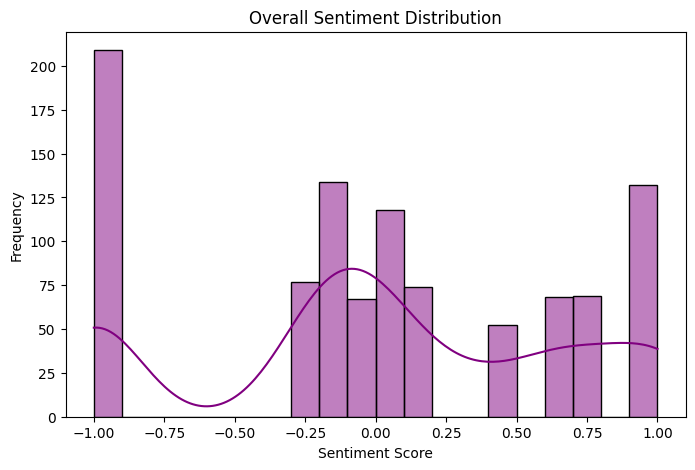

<ipython-input-22-c1756d2ce564>:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Topic", y="Sentiment", data=df_social_new, palette="coolwarm")


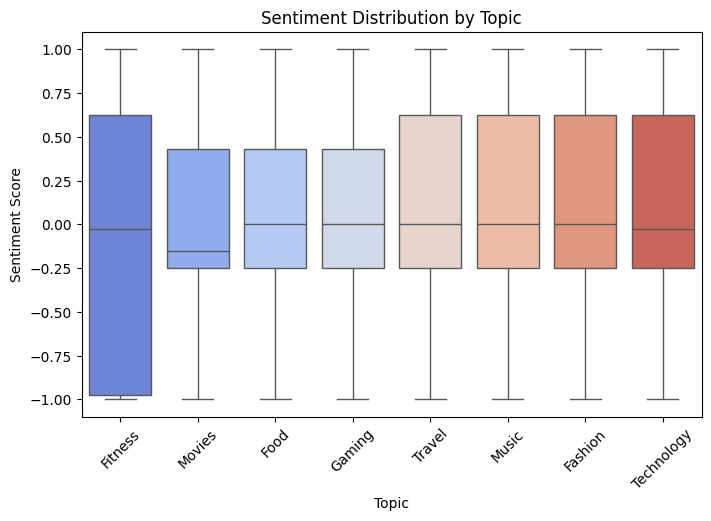

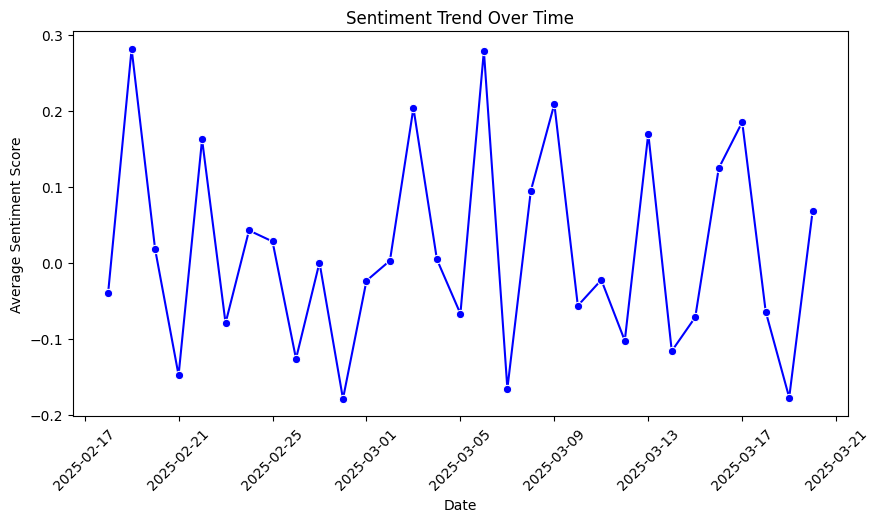

<ipython-input-22-c1756d2ce564>:76: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Topic", y="Sentiment", data=df_social_new, ci=None, palette="viridis")
<ipython-input-22-c1756d2ce564>:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Topic", y="Sentiment", data=df_social_new, ci=None, palette="viridis")


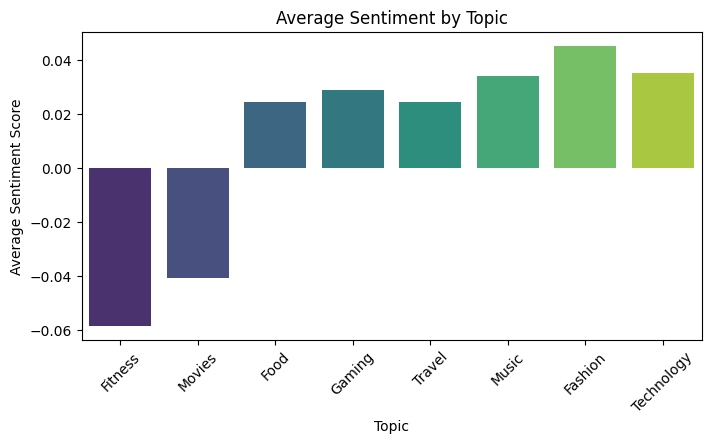

In [22]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from datetime import datetime, timedelta


topics = ["Technology", "Fashion", "Gaming", "Fitness", "Food", "Travel", "Movies", "Music"]

sentiment_texts = {
    "positive": [
        "Absolutely love this!", "Best experience ever!", "Highly recommended!",
        "Amazing quality, will buy again!", "Superb product and great service!"
    ],
    "neutral": [
        "It's okay, nothing special.", "Not bad, but not great either.",
        "An average experience.", "Could be better, but not the worst.", "Neutral feeling about this."
    ],
    "negative": [
        "Terrible experience!", "Worst purchase ever!", "I regret buying this.",
        "Not worth the money at all!", "Very disappointed, would not recommend."
    ]
}

n_samples = 1000
data = {
    "PostID": np.arange(1, n_samples + 1),
    "Topic": np.random.choice(topics, size=n_samples),
    "Text": [np.random.choice(sentiment_texts[np.random.choice(["positive", "neutral", "negative"])])
             for _ in range(n_samples)],
    "Timestamp": [datetime.now() - timedelta(days=random.randint(0, 30)) for _ in range(n_samples)]
}

df_social_new = pd.DataFrame(data)

df_social_new["Sentiment"] = df_social_new["Text"].apply(lambda x: TextBlob(x).sentiment.polarity)

file_path_new_social = r"/content/social_media_sentiment.csv"
df_social_new.to_csv(file_path_new_social, index=False)

df_social_new.head()


df_social_new["Timestamp"] = pd.to_datetime(df_social_new["Timestamp"])

df_social_new["Date"] = df_social_new["Timestamp"].dt.date

plt.figure(figsize=(8, 5))
sns.histplot(df_social_new["Sentiment"], bins=20, kde=True, color="purple")
plt.title("Overall Sentiment Distribution")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x="Topic", y="Sentiment", data=df_social_new, palette="coolwarm")
plt.title("Sentiment Distribution by Topic")
plt.xlabel("Topic")
plt.ylabel("Sentiment Score")
plt.xticks(rotation=45)
plt.show()

daily_sentiment = df_social_new.groupby("Date")["Sentiment"].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x="Date", y="Sentiment", data=daily_sentiment, marker="o", color="blue")
plt.xticks(rotation=45)
plt.title("Sentiment Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Average Sentiment Score")
plt.show()

plt.figure(figsize=(8, 4))
sns.barplot(x="Topic", y="Sentiment", data=df_social_new, ci=None, palette="viridis")
plt.title("Average Sentiment by Topic")
plt.xlabel("Topic")
plt.ylabel("Average Sentiment Score")
plt.xticks(rotation=45)
plt.show()